In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.stats import chisquare

In [2]:
test = np.loadtxt('25-01-31-16-14.data')
test[:,1] = test[:,1] - test[0,1]
test[:,1]

array([0.00000e+00, 1.00000e+00, 2.00000e+00, ..., 6.07808e+05,
       6.07809e+05, 6.07810e+05])

In [3]:
time_bet_decay = []
#time_bet_timeout

In [4]:
for i in test:
    if i[0]<4e04:
        time_bet_decay.append(i[0])

In [5]:
num_bins = 40

In [6]:
length = len(time_bet_decay)
bin_length = len(time_bet_decay)//num_bins
count_array = []
bins_array = []
count=0
for i in range(num_bins):
    for j in time_bet_decay:
        if j < i*bin_length and j > (i-1)*bin_length and i>1:
            count+=1
    count_array.append(count)
    count=0
    bins_array.append(i*bin_length)
count_array = count_array[1:]

In [7]:
max_count = np.max(count_array)
count_frac = []
bin_frac = []
iterations = int(math.log2(num_bins))
bin_frac_val = 0
for i in range(0,iterations):
    binary = 2**i
    count_frac.append(max_count/binary)
    for j in range(len(count_array)):
        if count_array[j] < count_frac[i] and count_array[j-1] > count_frac[i]:
            bin_frac_val = bins_array[j+1]
    bin_frac.append(bin_frac_val)

diff = [bin_frac[i + 1] - bin_frac[i] for i in range(len(bin_frac) - 1)]
print(diff)
half_life = np.average(diff[1:])
print('Half-life: ', np.average(diff[1:]))

[1976, 1729, 1235, 1729]
Half-life:  1564.3333333333333


In [8]:
def func():
    

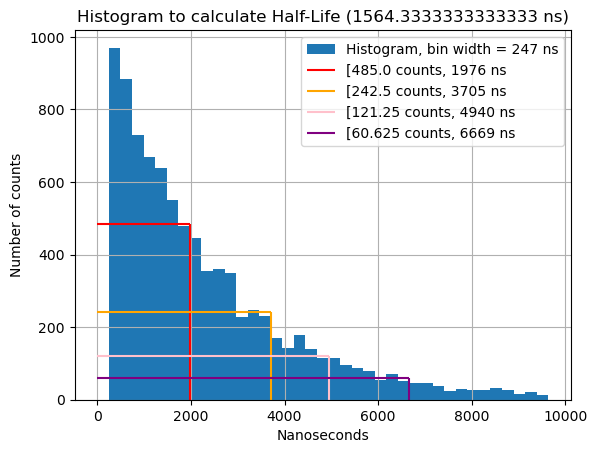

In [9]:
plt.hist(bins_array[:-1], bins_array, weights=count_array, label=f'Histogram, bin width = {bin_length} ns')
colours = ['','red', 'orange', 'pink', 'purple', 'black', 'brown', 'gray', 'green']
for i in range(1,iterations):
    plt.vlines(ymin=0, x=bin_frac[i], color=colours[i], ymax=count_frac[i], label = f'[{count_frac[i]} counts, {bin_frac[i]} ns')
    plt.hlines(xmin=0, xmax=bin_frac[i], y=count_frac[i], color=colours[i])
plt.ylabel('Number of counts')
plt.xlabel('Nanoseconds')
plt.grid()
plt.title(f'Histogram to calculate Half-Life ({half_life} ns)')
plt.legend()